In [1]:
#| echo: false

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NOTE: you can ignore this code, it's just for data preparation

# Imports the age guessing data from the database,
# restructures it and merges it with the game data.

dt_raw = pd.read_json("https://get-uktfaces-data-suq3dizvtq-uc.a.run.app")
dt = pd.melt(
    dt_raw.reset_index(names="FileId"), 
    id_vars=["FileId"],
    var_name="UserId",
    value_name="Data"
)
dt_measurements = pd.json_normalize(dt['Data']).rename(columns=lambda x: x[0].upper() + x[1:])
dt = pd.concat([dt.drop(columns=["Data"]), dt_measurements], axis=1)

game = pd.read_json("https://get-uktfaces-game-suq3dizvtq-uc.a.run.app").rename(columns={"id": "FileId", "age": "Age", "race_f": "Race", "gender": "Gender"})
dt = dt.merge(game, on="FileId", how="left")[["FileId", "UserId", "Guess", "Age", "Race", "Gender", "Position", "TimeStart", "TimeEnd"]].copy()

# Data Summaries and Visualization

Open in Google Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/stat2025/blob/main/02-Data-Summaries.ipynb)



## Introduction

In this section we will learn the basic summaries of data and how to compute them using Python. We will also learn how to visualize data using histograms, box plots, and smoothed density plots.

## The Arithmetic Mean

The arithmetic mean is a measure of central tendency that is calculated as the sum of the values divided by the number of values. It is the most common measure of central tendency and is often referred to simply as the "average".

For a collection of $n$ values $x_1, x_2, \ldots, x_n$, the arithmetic mean is calculated as:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

Note that this notation is just a short way of writing:

$$
\bar{x} = \frac{x_1 + x_2 + \ldots + x_n}{n}
$$

:::{#exm-mean}
## The Arithmetic Mean


For a collection of $n = 3$ values:  $x_1 = 5$, $x_2 = 4$, and $x_3 = 6$, the arithmetic mean is:

$$
\bar{x} = \frac{5 + 4 + 6}{3} = 5
$$

:::

In [2]:
# Calculating the average of a list of values

np.mean([5, 4, 6])

np.float64(5.0)

:::{.callout-important}
# The Sum of Deviations from the Average

Consider a collection of $n$ values $x_1, x_2, \ldots, x_n$ with an arithmetic mean of $\bar{x}$. For each value, we can define 
the deviation from the average as $x_i - \bar{x}$. The sum of these deviations is always zero.

$$
\sum_{i=1}^{n} (x_i - \bar{x}) = 0
$$

:::

:::{#exm-sum-of-deviations}
Consider the collection of values $x_1 = 5$, $x_2 = 4$, and $x_3 = 6$ with an arithmetic mean of $\bar{x} = 5$. The deviations from the average are:

$$
\begin{align*}
x_1 - \bar{x} & = 5 - 5 = 0 \\
x_2 - \bar{x} & = 4 - 5 = -1 \\
x_3 - \bar{x} & = 6 - 5 = 1
\end{align*}
$$

The sum of these deviations is:

$$
(5 - 5) + (4 - 5) + (6 - 5) = 0 + (-1) + 1 = 0
$$
:::

In [3]:
# Create a numpy array (you can think of it as a list of values with a couple of special features)
x = np.array([5, 4, 423, 23, 14])

# To print the array, just type its name on the last line of the cell
x

array([  5,   4, 423,  23,  14])

In [4]:
# Pass the values to the np.mean function to calculate the arithmetic average

np.mean(x)

np.float64(93.8)

In [5]:
# Subtract the mean from each value in the array
# Because this is the last line of the cell, the result will be printed
x - np.mean(x)

array([-88.8, -89.8, 329.2, -70.8, -79.8])

In [6]:
# Pass the result to the np.sum function to calculate the sum of the differences
# You will get a value of zero because the sum of the differences is always zero
# This is a property of the arithmetic mean

np.sum((x - np.mean(x)))

np.float64(0.0)

:::{#exr-sum-of-deviations}
## The Sum of Deviations from the Average

Show that the sum of deviations from the average is always zero for any collection of values.
:::
:::{.callout-note collapse="true"}
## Solution (Click to expand)
There are $n$ values $x_1, x_2, \ldots, x_n$ with an arithmetic mean of $\bar{x}$. The sum of deviations from the average is:

$$
\begin{align*}
\sum_{i=1}^{n} (x_i - \bar{x}) & = (x_1 - \bar{x}) + (x_2 - \bar{x}) + \ldots + (x_n - \bar{x}) \\
& = x_1 + x_2 + \ldots + x_n - (\underbrace{\bar{x} + \bar{x} + \ldots + \bar{x}}_{\text{n times}}) \\
& = x_1 + x_2 + \ldots + x_n - n\bar{x} \\
& = \frac{n}{n}(x_1 + x_2 + \ldots + x_n) - n\bar{x} \\
& = n \frac{x_1 + x_2 + \ldots + x_n}{n} - n\bar{x} \\
& = n\bar{x} - n\bar{x} = 0
\end{align*}
$$

:::

As we have seen, it is hard to guess the exact age of a person. In our example we happen to know the age of the persons at the time the images were taken and so we can calculate the error of the guesses. The error is the difference between the guess and the actual age. We can calculate the mean error and the median error.

$$
\text{Guess Error} = \text{Guessed Age} - \text{Actual Age}
$$

The guesses are contained in the `Guess` column and the actual ages in the `Age` column. The error is calculated as `Guess - Age`. We will create a new column in the DataFrame called `GuessError` to store the errors.

In [7]:
# What was the average guess error in the dataset? First let's calculate the guess error for each row.

dt["GuessError"] = dt["Guess"] - dt["Age"]

# Selects the Guess, Age and GuessError columns and shows the first 5 rows.
dt[['Guess', 'Age', 'GuessError']].head()

,Guess,Age,GuessError
0,58,72,-14
1,70,62,8
2,57,75,-18
3,19,21,-2
4,30,28,2


In [8]:

# There are multiple ways to calculate the average age of the users in the dataset.
## Using the mean function

np.mean(dt["GuessError"])

np.float64(1.643879173290938)

In [9]:
## Using the mean method of the column

dt["GuessError"].mean()

np.float64(1.643879173290938)

In [10]:
# Here we will print the average guess error and round it to two decimal places

print("The average guess errors in the images was", dt["GuessError"].mean().round(2), "years.")

The average guess errors in the images was 1.64 years.


:::{#exm-mean-2}
## The Average Guess Duration

- Create a new column in the dataset `dt` called `GD` (short for "Guess Duration") that contains the time (in _seconds_) it took for each participant to guess the age of the person in the photo. 
- Calculate the arithmetic mean of the guess duration. Use the `TimeEnd` and `TimeStart` columns to calculate the guess duration and keep in mind that `TimeStart` and `TimeEnd` are measured in milliseconds.

:::

In [11]:
# Write your code here and run it

# The TimeEnd and TimeStart contain the time in milliseconds when the user started seeing the image and when they finished.
# To calculate the number of seconds the user spent seeing the image, we need to subtract TimeStart from TimeEnd.
# As both columns are measured in milliseconds, the result will also be in milliseconds.
# We want the new column to be in seconds, so we need to divide the result by 1000.

dt["GD"] = (dt["TimeEnd"] - dt["TimeStart"]) / 1000

# Print out the first few rows of the three columns as a check
dt[["TimeStart", "TimeEnd", "GD"]].head()


,TimeStart,TimeEnd,GD
0,1728456243117,1728456250343,7.226
1,1728456238837,1728456243116,4.279
2,1728456228654,1728456235495,6.841
3,1728456288579,1728456295650,7.071
4,1728456250345,1728456254708,4.363


In [12]:
# You can also manually check the calculation in the first row by
# just copying the values from the TimeStart and TimeEnd columns and
# dividing by 1000.

(1728456250343 - 1728456243117) / 1000

7.226

## The Median and Mode

For a collection of values $x_1, x_2, \ldots, x_n$, the **median** is the middle value when the values are sorted in ascending order. If the number of values is odd, the median is the middle value. If the number of values is even, the median is the average of the two middle values. It is a measure of central tendency that is less sensitive to extreme observations than the mean.

The **mode** is the value that appears most frequently in a collection of values. A collection of values can have no mode (all values appear equally frequently), one mode, or multiple modes (two or more values appear equally frequently).
The mode is generally only useful for categorical data (such as gender, employment status, etc.) and not for continuous data (such as income, speed, duration, etc.).

:::{#exm-median}
## Computing the Median

Let's compute the median for 

$$
(1, 5, 3, 4, 2)
$$. 

First, we sort the values in ascending order: 

$$
(1, 2, 3, 4, 5)
$$.

Since the number of values is odd (5), the median is the middle value, which is $3$. _Approximately_ half of the values are less than the median and _Approximately_ half are greater than the median. In this example $1$ and $2$ are less than the median and $4$ and $5$ are greater than the median (so not _exactly_ 50 percent).

Let's compute the median for 

$$
(7, 5, 12, 4, 2, 1.2)
$$.

First, we sort the values in ascending order: 

$$
(1.2, 2, 4, 5, 7, 12)
$$.

Since the number of values is 6, therefore _even_, so the median is the average of the two middle values, which are $4$ and $5$. Therefore, the median is $(4 + 5) / 2 = 4.5$. Again, _approximately_ half of the values are less than the median and half are greater than the median.

:::



In [13]:
# The same example as above using the median function from numpy

np.median([1, 5, 3, 4, 2])

np.float64(3.0)

In [14]:
np.median([1.2, 2, 4, 5, 7, 12])

np.float64(4.5)

In [15]:
# The median of the guess error

np.median(dt["GuessError"])

np.float64(1.0)

The median guess error is one year. This means that about half of the errors were less than one year and about half were larger than one year.

:::{#exr-median}
## Computing the Median

Compute the median for the following collections of values: $z = (2.1, 5, 8, 1, 2, 3)$ first on a piece of paper and then using Python.

:::

:::{.callout-note collapse="true"}
## Solution (Click to expand)

1. Sort the values in ascending order

$$
(1, 2, 2.1, 3, 5, 8)
$$.

See if the number of values is odd or even. Since the number of values is 6, the median is the average of the two middle values, which are $2.1$ and $3$. Therefore, the median is $(2.1 + 3) / 2 = 2.55$.
:::

In [16]:
# Write your code here and run it

np.median([2.1, 5, 8, 1, 2, 3])

np.float64(2.55)

## The Range of the Data

Reporting the average of a collection of values is useful, but it only tells a part of the story. We also want to know how different the values in the collection are. One way to measure this is to describe the variation of the data. There are multiple ways to measure the variation of a dataset, here we will start with the percentiles and the range.

- The smallest value in the dataset is called the **minimum** (or the 0th percentile, 0th quartile, or 0th decile).
- The largest value in the dataset is called the **maximum** (or the 100th percentile, 100th quartile, or 100th decile).

- The **range** of the data is the pair of the minimum and the maximum. (Sometime the range is understood as the difference between the maximum and the minimum.)
- The **span** of the data is the difference between the maximum and the minimum.
- The difference between the 75th percentile and the 25th percentile is called the **interquartile range** (IQR) and it is a measure of the spread of the middle 50% of the data.

## The Quartiles

- The **first quartile** (Q1): approximately 25% of the data fall below this value.
- The **second quartile** (Q2) is the value below which (approx.) 50% of the data fall. This is just another name for the _median_.
- The **third quartile** (Q3) is the value below which (approx.) 75% of the data fall.

Instead of four parts (quartiles), we can divide the data into ten parts (deciles) or one hundred parts (percentiles) or into any number of parts (quantiles).

- The **first decile** (D1) is the value below which (approx.) 10% of the data fall.
- The **second decile** (D2) is the value below which (approx.) 20% of the data fall.
...
- The **ninth decile** (D9) is the value below which (approx.) 90% of the data fall.

- The **first percentile** (P1) is the value below which (approx.) 1% of the data fall.
- The **second percentile** (P2) is the value below which (approx.) 2% of the data fall.
...
- The **ninetieth percentile** (P90) is the value below which (approx.) 90% of the data fall.
- The **ninety-ninth percentile** (P99) is the value below which (approx.) 99% of the data fall.



In [17]:
# We can compute the quartiles of the guesses of the users in the dataset using the quantile method
# and the numpy quantile function.

np.quantile(dt["GuessError"], [0.25, 0.5, 0.75])

array([-3.,  1.,  7.])

The result from the quantile function tells us the values of the three quartiles: (25% or 0.25: Q1 (the first quartile)),
(50% or 0.5: Q2 (the second quartile, the median)), and (75% or 0.75: Q3 (the third quartile)).

- The first quartile (Q1) is -3 years, so about one quarter of the guesses _underestimated_ the age by more than 3 years.
- The median is 1 year, so about half of the guesses _overestimated_ the age by more than 1 year.
- The third quartile (Q3) is 7 years, meaning that about one quarter of the guesses _overestimated_ the age by more than 7 years and that the guess error was less than 7 years in about 75% of the guesses.


In [18]:
# Pandas Series (a column of a DataFrame) also have a quantile method.

dt["GuessError"].quantile([0.25, 0.5, 0.75])

0.25   -3.0
0.50    1.0
0.75    7.0
Name: GuessError, dtype: float64

In [19]:
# A quick way to get an overview of the data is to use the describe method of a pandas Series (a column of a DataFrame).

dt["GuessError"].describe()

count    1258.000000
mean        1.643879
std         9.747915
min       -35.000000
25%        -3.000000
50%         1.000000
75%         7.000000
max        60.000000
Name: GuessError, dtype: float64

:::{.callout-important}
## Minimum and Maximum

When working with data it is important to check the extreme values (minimum and maximum). Data collection and programming errors can often be discovered
by checking the plausible range of the data. For example, if you are working with a dataset of ages, and you find that the minimum age is -5, then you know that there is an error in the data collection process. Similarly, if you are working with a dataset of heights and you find that the maximum height is 300 cm, then you should examine the data processing steps.
:::

## The Boxplot

The boxplot is a visualization of the quartiles of a distribution. It shows the minimum and maximum values, the first quartile, the median, and the third quartile. The boxplot is a useful tool for identifying outliers in the data and for comparing distributions.

The boxplot is constructed as follows:

1. A box is drawn from the first quartile to the third quartile. (How many values are in the box?)
2. A line is drawn inside the box at the median.
3. Lines (whiskers) are drawn from the box to the minimum and maximum values that are not outliers.
4. Outliers are plotted as individual points.

By default, values that are more than 1.5 times the IQR range from the first or third quartile are shown as outliers.

:::{.callout-warning}
## Outliers and Errors

The term "outlier" is often used to describe values that are unusual or unexpected. Outliers can result from errors in the data collection process, from unusual events, or from the _natural variability of the data_. Identifying outliers is very important because they can help you find errors in your data (perhaps wrong data entry, wrong programming logic, etc.). However, you should never think of outliers as "bad" data, unless you can indeed identify the source of the error. You cannot simply remove outliers from your data without understanding why they are there.

Later on we will see that whether or not an observation looks unusual (an outlier) or not only makes sense in the context of a 
specific statistical model.

:::


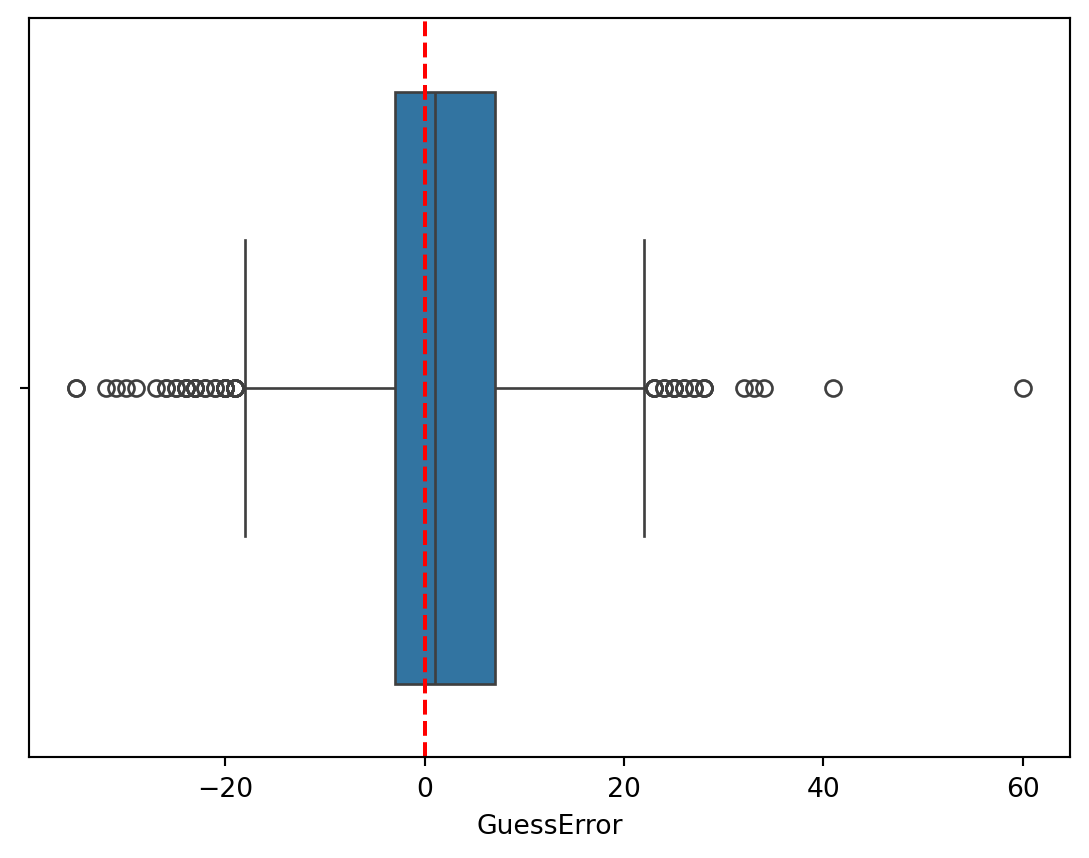

In [20]:
# One way to create a boxplot easily is to use the seaborn library (it is imported as sns at the top of this notebook).

sns.boxplot(data=dt, x="GuessError")
plt.axvline(x=0, color='r', linestyle='--')

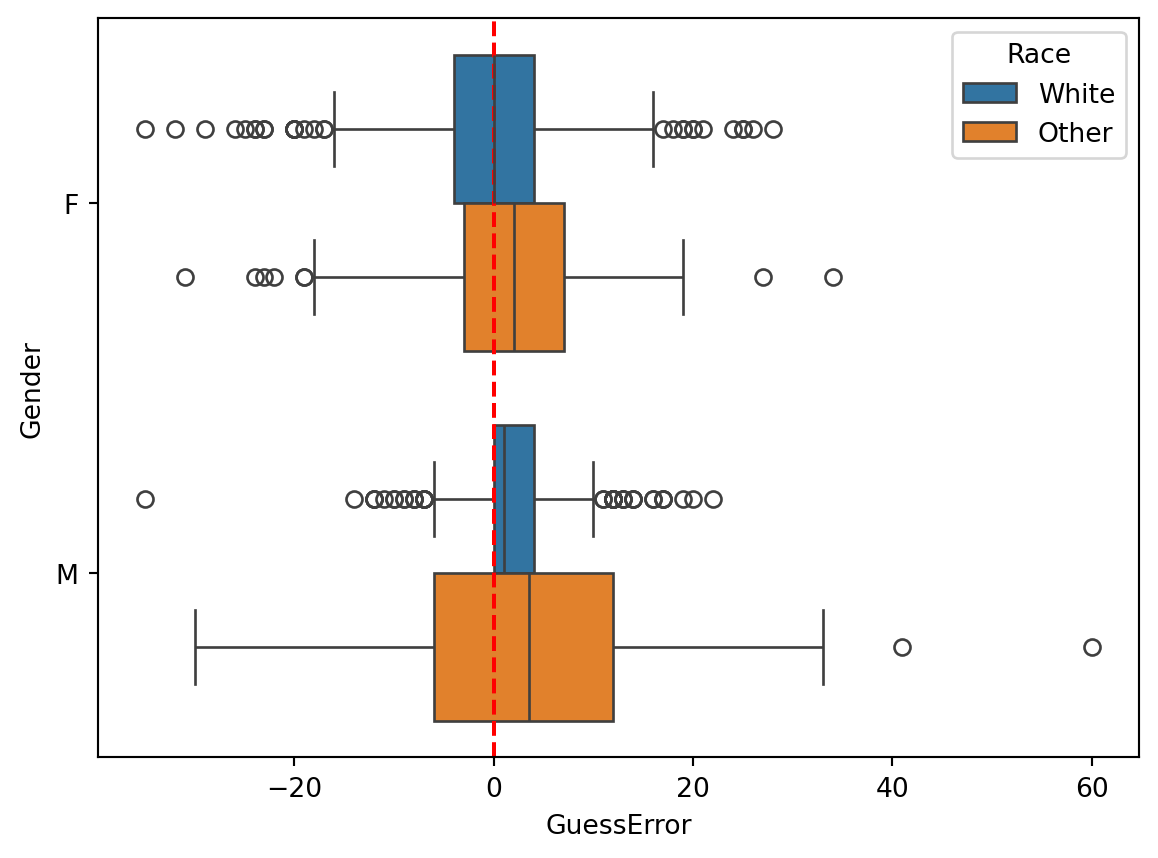

In [21]:
#| label: fig-boxplots-rage-gender
#| fig-cap: "Separate boxplots for the distribution of the guess errors by gender and race of the person in the image"

sns.boxplot(data=dt, x="GuessError", y="Gender", hue="Race")
plt.axvline(0, color="red", linestyle="--")

:::{#exr-quantiles}
## The Quartiles and the Percentiles

You have already create a column `GD` (guess duration) in the previous exercise. Now use this column to solve the following tasks:

1. What was the longest guess duration? (Use the `max` method of the new column.)
2. What was the shortest guess duration? (Use the `min` method of the new column.)
3. Use the quantile method of the new column to calculate the first quartile, the median, and the third quartile. Write a short sentence explaining the meaning of these values.
4. What was the guess duration such that 90% of the guesses took less than this duration? (Use the `quantile` method of the new column.)
5. What was the guess duration such that 20% took more than this duration? (Use the `quantile` method of the new column.)
6. Draw a boxplot of the guess durations.
7. Draw a boxplot of the guess duration by `Gender`. Did the participants tend to take longer in guessing the age of males or females?
8. Draw a boxplot of the guess duration by `Gender` and `Race`. Did the participants tend to take longer in guessing the age of non-white women?
:::

In [22]:
# Write your code here, then compare it with the solution below.

In [23]:
# Solution

# 1. To compute the minimum

print("The fastest guess took ", dt["GD"].min(), "seconds.")

# 2. To compute the maximum

print("The slowest guess took ", dt["GD"].max(), "seconds.")

The fastest guess took  0.413 seconds.
The slowest guess took  202.204 seconds.


In [24]:
# 3. Now compute the quartiles

dt["GD"].quantile([0.25, 0.5, 0.75])

0.25     4.998
0.50     7.587
0.75    13.165
Name: GD, dtype: float64

About one quarter of the guesses took less than 5.3 seconds (Q1). About three quarters took more than 5.3 seconds.
In about half the guesses the users spent less than 8.3 seconds (median) and in about half the guesses the users spended more than 8.3 seconds.
The third quartile tells us about the longest guesses. About one quarter of all guesses took more than 15.6 seconds. Respectively, about three quarters took less than 15.6 seconds.

In [25]:
# 4. Here we want to find the 90th percentile (0.9 quantile)

dt["GD"].quantile(0.9)

np.float64(23.79699999999999)

Its value is 31.9 seconds. This means that about 90% of the guesses took less than 31.9 seconds.

In [26]:
# 5. Here we are looking for the 80th percentile (0.8 quantile)

dt["GD"].quantile(0.8)

np.float64(15.272800000000004)

Its value is 18.5 seconds, meaning that about 20% of the guesses took longer than 18.5 seconds, and about 80% took less than this.

<Axes: xlabel='GD'>

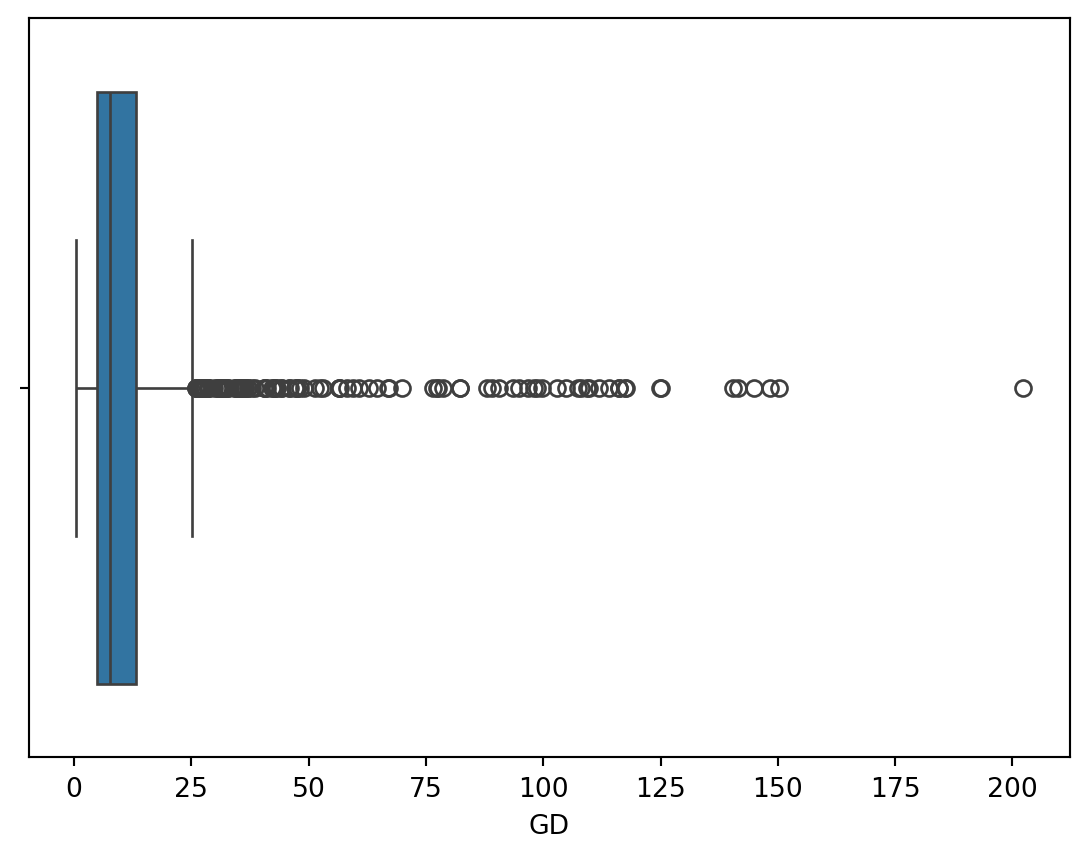

In [27]:
# 6. Boxplot of the guess duration

sns.boxplot(data=dt, x="GD")

The boxplot depicts the minimum and maximum values, the first quartile, the median, and the third quartile. The whisker on the left side of the box extends to the minimum value. The maximum value is shown as an individual point, as it is classified as an outlier.

<Axes: xlabel='GD', ylabel='Gender'>

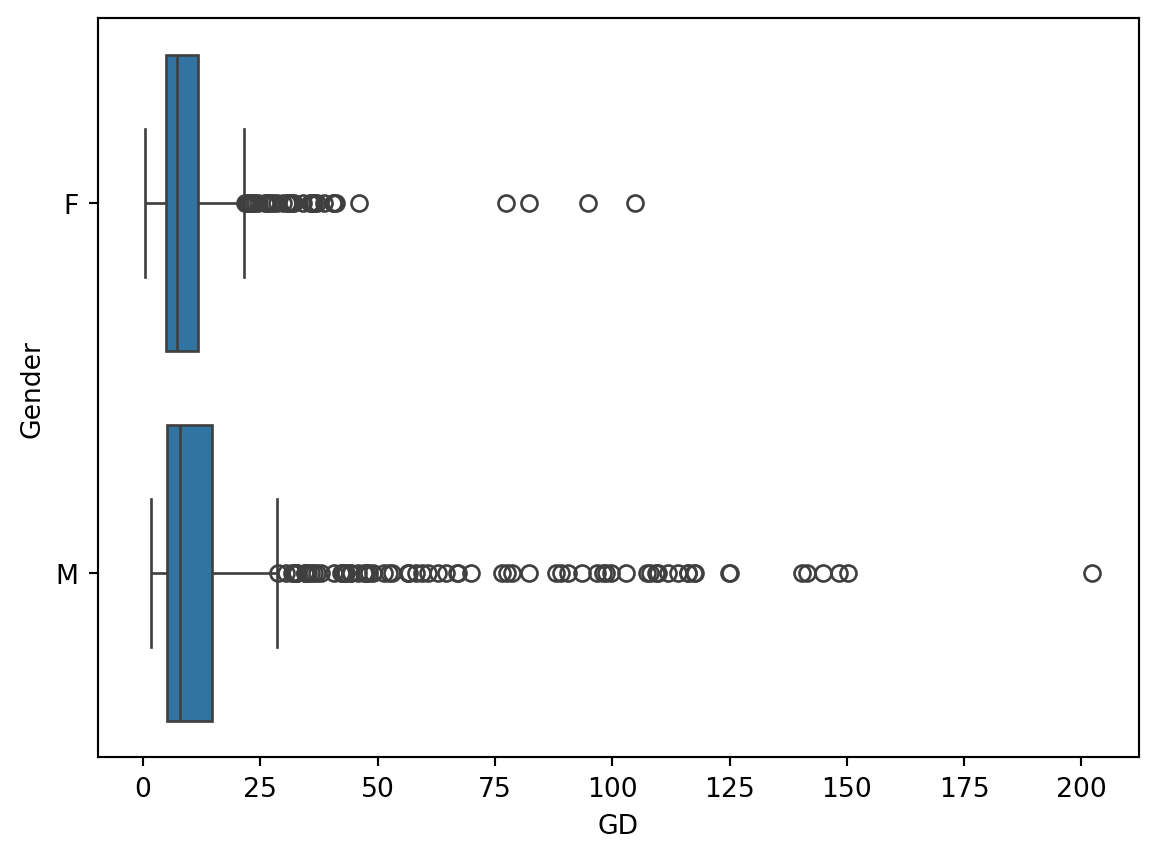

In [28]:
# 7. Boxplot of the guess duration by gender

sns.boxplot(data = dt, x = "GD", y = "Gender")

This boxplot shows us the distributions of the guess durations for images with women and with men. The guess durations for men appear to be more dispersed than those for women (judging from the IQR, the whiskers and the outliers). This may indicate that the participants were more uncertain about the age of some of the men and took longer to enter their guesses.


<Axes: xlabel='GD', ylabel='Gender'>

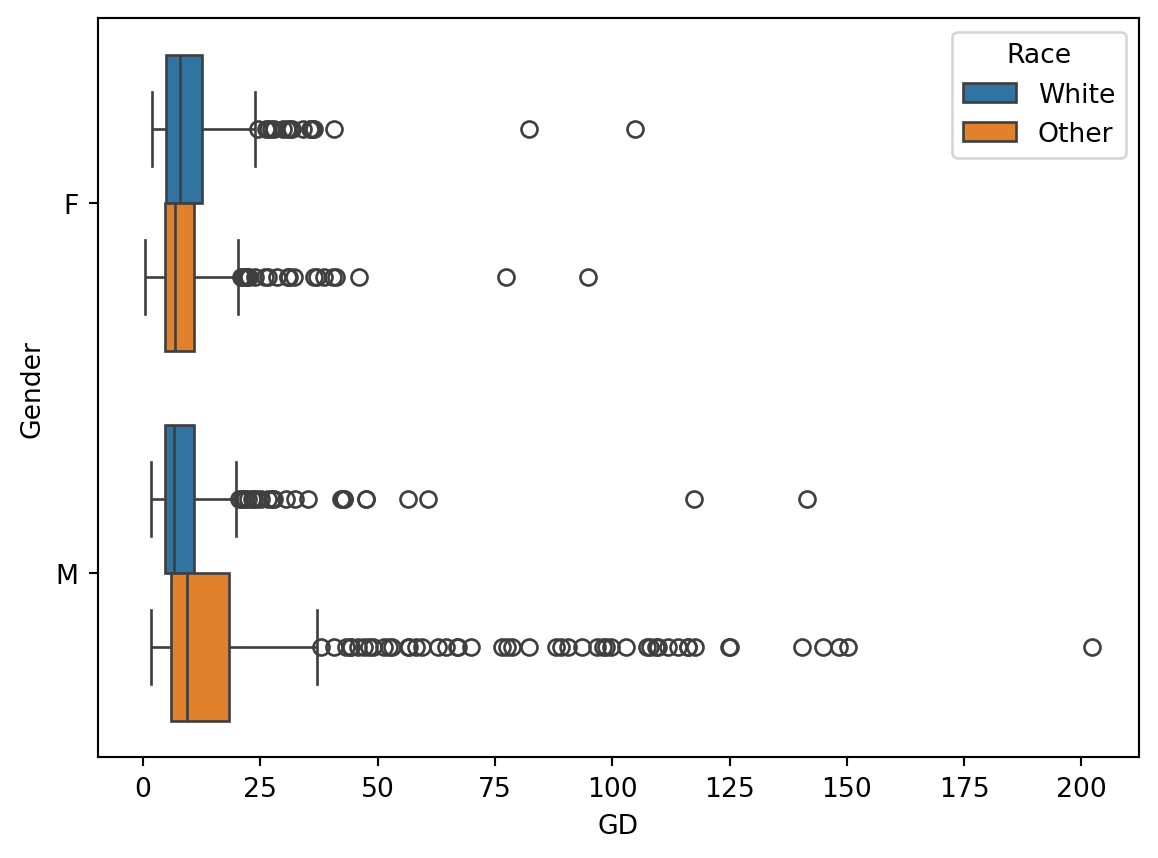

In [29]:
# 8. Boxplot of the guess duration by gender and race

sns.boxplot(data = dt, x = "GD", y ="Gender", hue="Race")

The comparison of the distributions of guess durations by both gender and race shows that the guess durations were most dispersed for non-white men. Furthermore, the median guess duration (line inside the box of the boxplot) was the longest for this group. This may indicate that the participants were more uncertain about guessing the age in this group and took longer to think about their guesses.

## Bar Charts

You are probably already familiar with bar charts as these are pervasive in the media. Bar charts are commonly used to visualize the frequency (the number of observations) of different categories. The height of the bars represents the frequency of each category.

We can count how many times each value appears in a column using the `value_counts` method. For example, let's count the number of guesses for men and women in the dataset.

In [30]:
dt["Gender"].value_counts()

Gender
M    666
F    592
Name: count, dtype: int64

The result of `.value_counts()` tells us that the users guessed the age of 378 images of men and 336 images of women. This is
what we call a _frequency table_. A very common visualization of a frequency table is a bar chart. The height (length if it is horizontal as in the example here) of the bars in this figure represent the frequency of each category.

<Axes: xlabel='count', ylabel='Gender'>

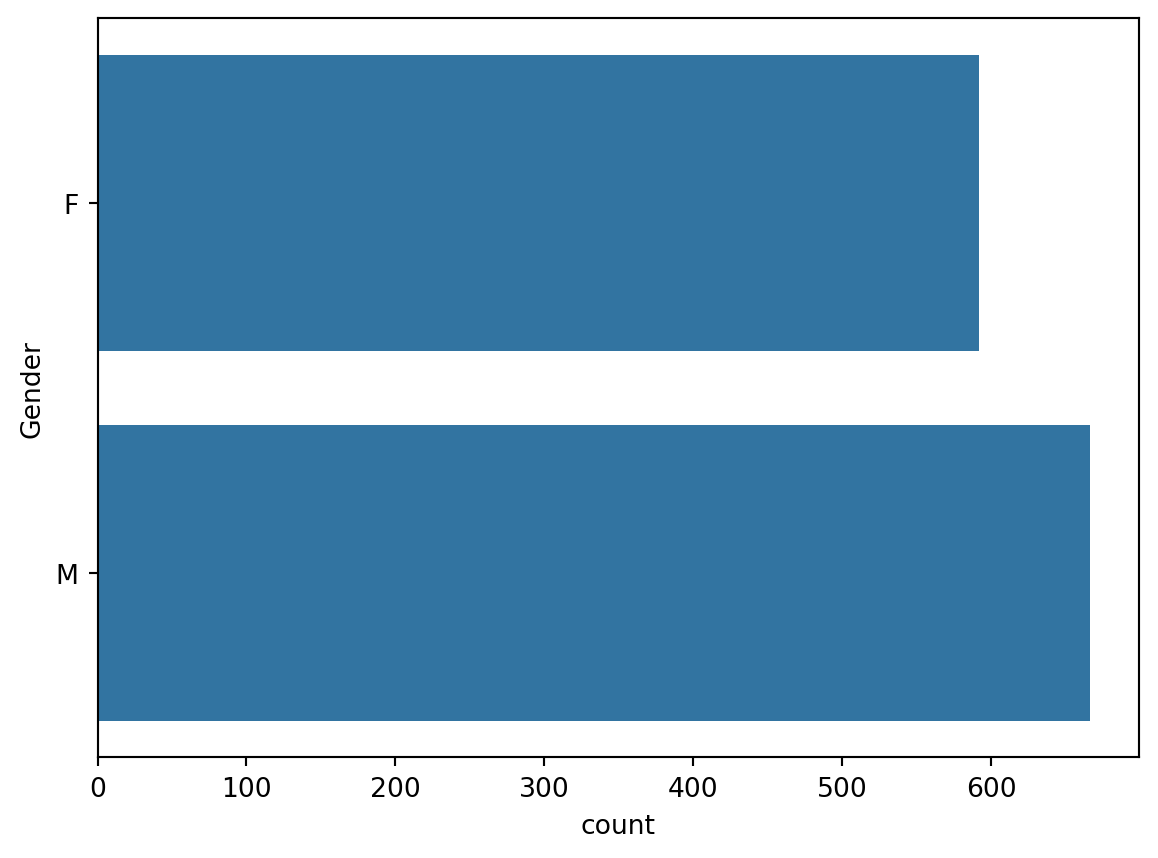

In [31]:
# You can create a bar chart using the countplot function from the seaborn library.

sns.countplot(dt, y = "Gender")

In [32]:
# Exercise: create a frequency table and a bar chart for the Race column

# First the frequency table
dt["Race"].value_counts()

Race
Other    666
White    592
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Race'>

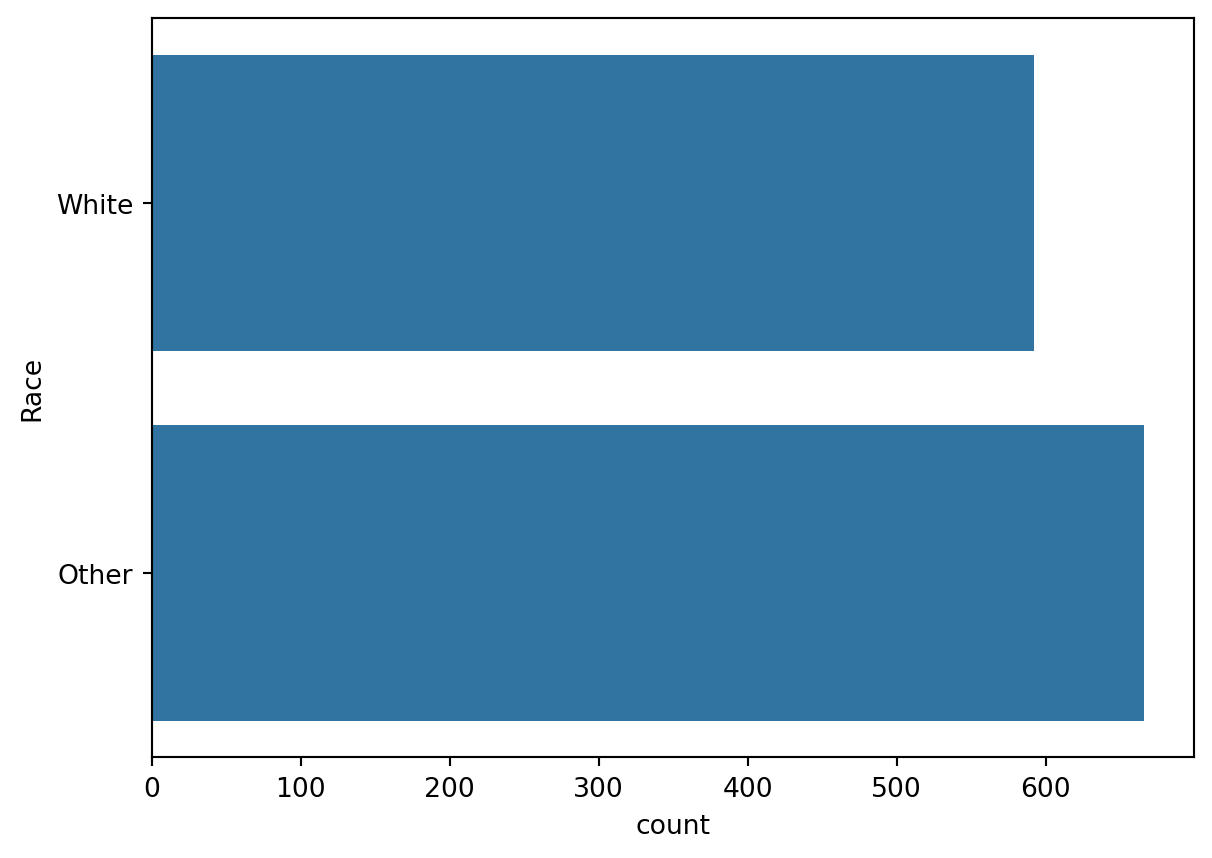

In [33]:
# And now the bar chart

sns.countplot(data = dt, y = "Race")

## The Histogram

In the previous block we encountered bar charts as a way to visualize the frequency of different categories. The histogram is a similar visualization, but it is used to visualize the distribution of a continuous variable. The problem it solves is that we cannot visualize the frequency of each value of a continuous variable because there are infinitely many values. Instead, we group the values into intervals (bins) and visualize the frequency of each bin. The number of bins is a parameter that can be adjusted to show more or less detail. Usually you will have to experiment with the number of bins to find a reasonable visualization.



Text(0, 0.5, 'Count')

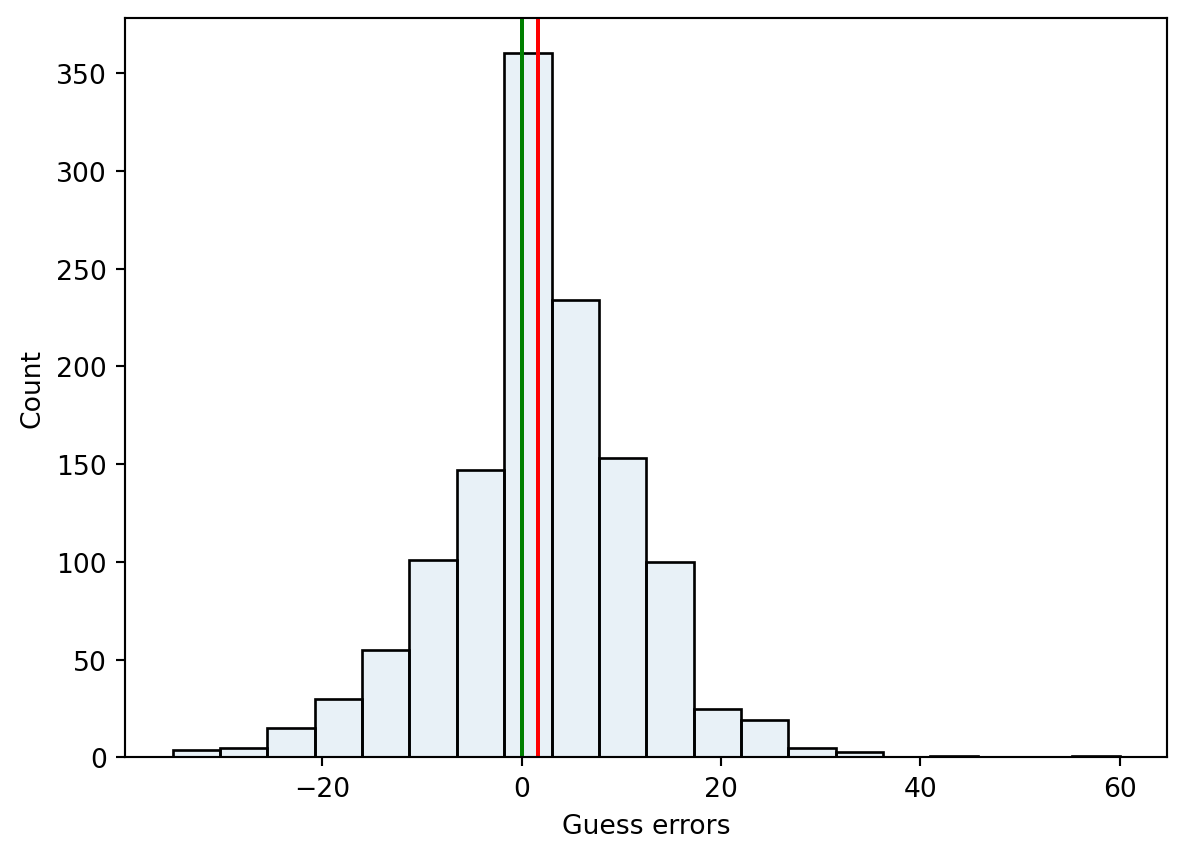

In [34]:
# Plot a histogram of the guess errors
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn histogram

sns.histplot(dt, x = "GuessError", bins=20, alpha=0.1)

# Draws a vertical line at x=0 (no guess error) in green
plt.axvline(x=0, color='green')

# Draws a vertical line at the mean guess error in red
plt.axvline(x=dt["GuessError"].mean(), color='red')

# Set axis labels
plt.xlabel("Guess errors")
plt.ylabel("Count")

:::{#exr-histogram}

## A Histogram of the Guess Durations

- Create a histogram of the guess durations, set the labels of the x-axis to "Guess Duration".
- Does the distribution of the guess durations look symmetric?

:::

<Axes: xlabel='GD', ylabel='Count'>

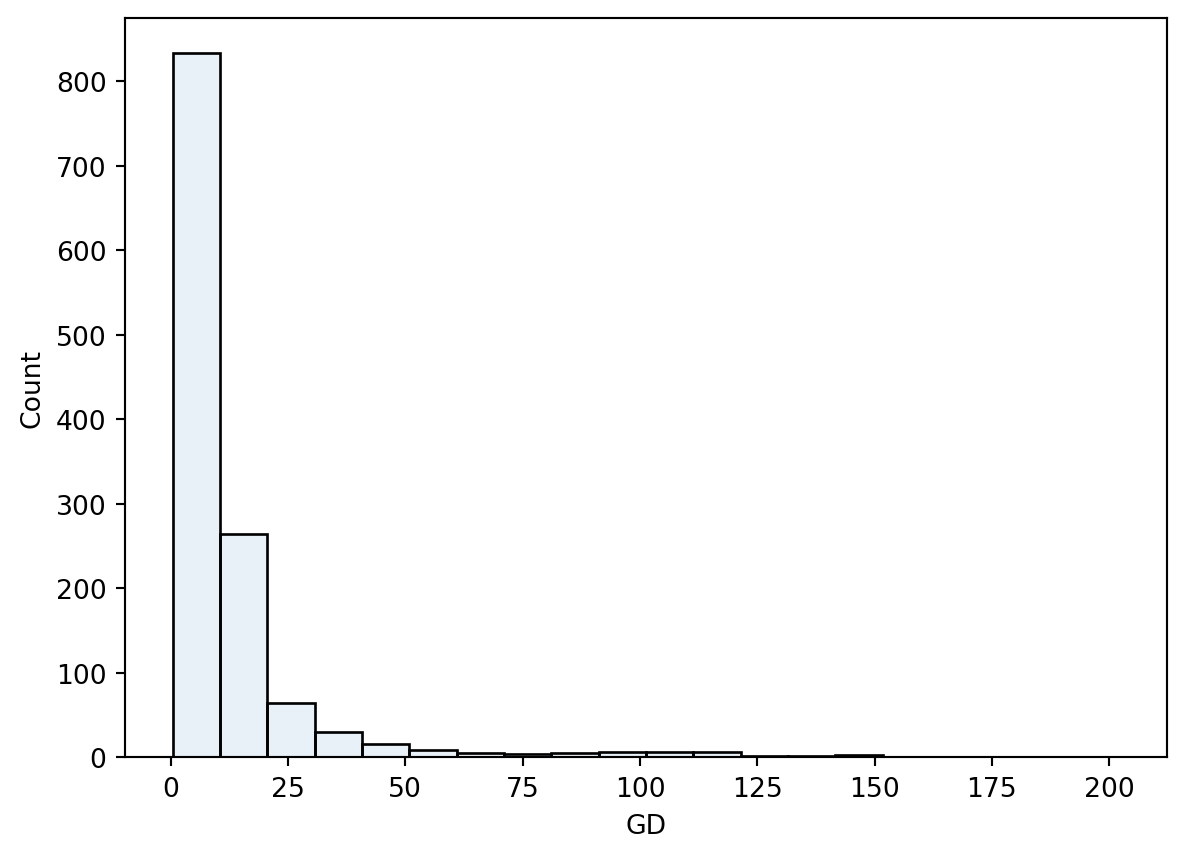

In [35]:
# Write your code here and run it

sns.histplot(dt, x = "GD", bins=20, alpha=0.1)

The distribution of the guess durations is not symmetric as was the case of the guess errors. It shows a high number of short guesses and many infrequent long guesses. 


## The Kernel Density Estimate

The kernel density estimate (KDE) is a smooth version of the histogram. It is a non-parametric method to estimate the probability density function of a continuous random variable (we will talk more about it when we introduce the concept of probability density functions later in the course).

Just like the histogram, the KDE has a parameter that controls the smoothness of the estimate.

<Axes: xlabel='GuessError', ylabel='Density'>

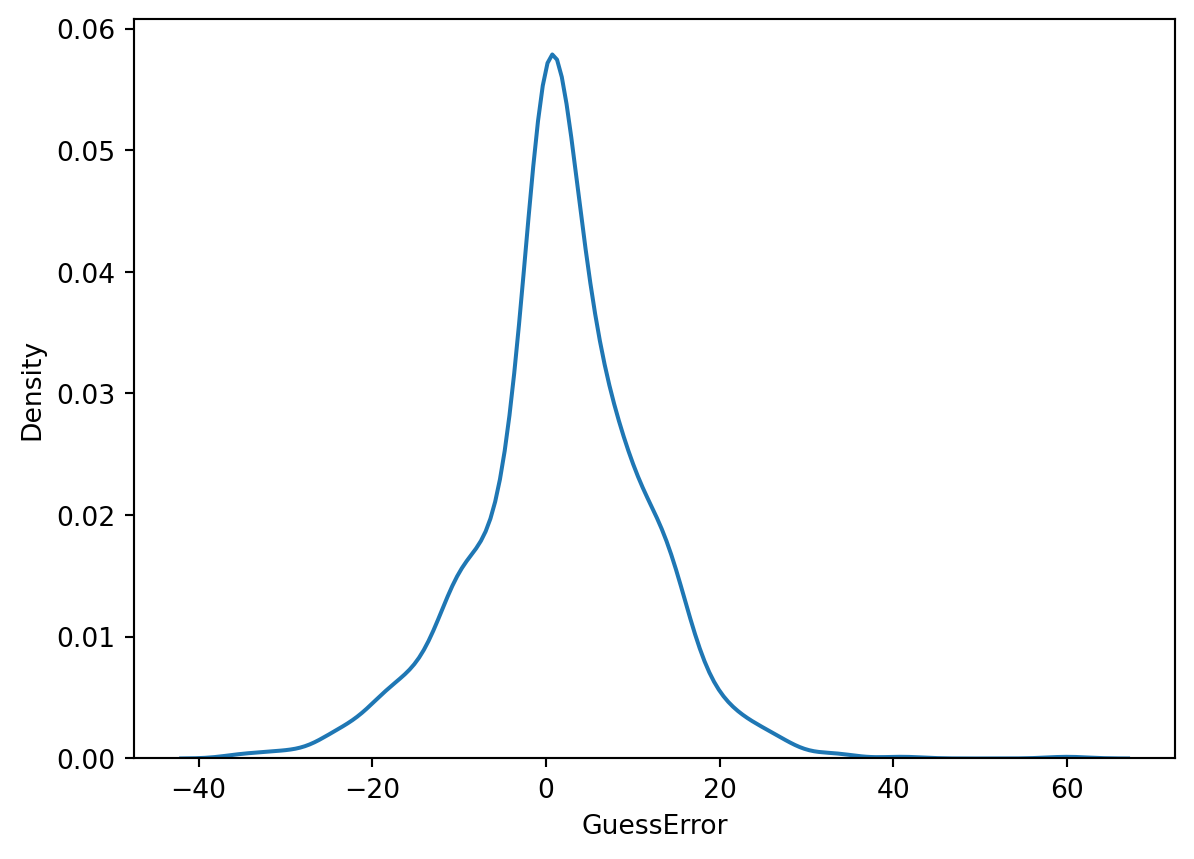

In [36]:
sns.kdeplot(data = dt, x = "GuessError", bw_adjust=1)

<Axes: xlabel='GuessError', ylabel='Density'>

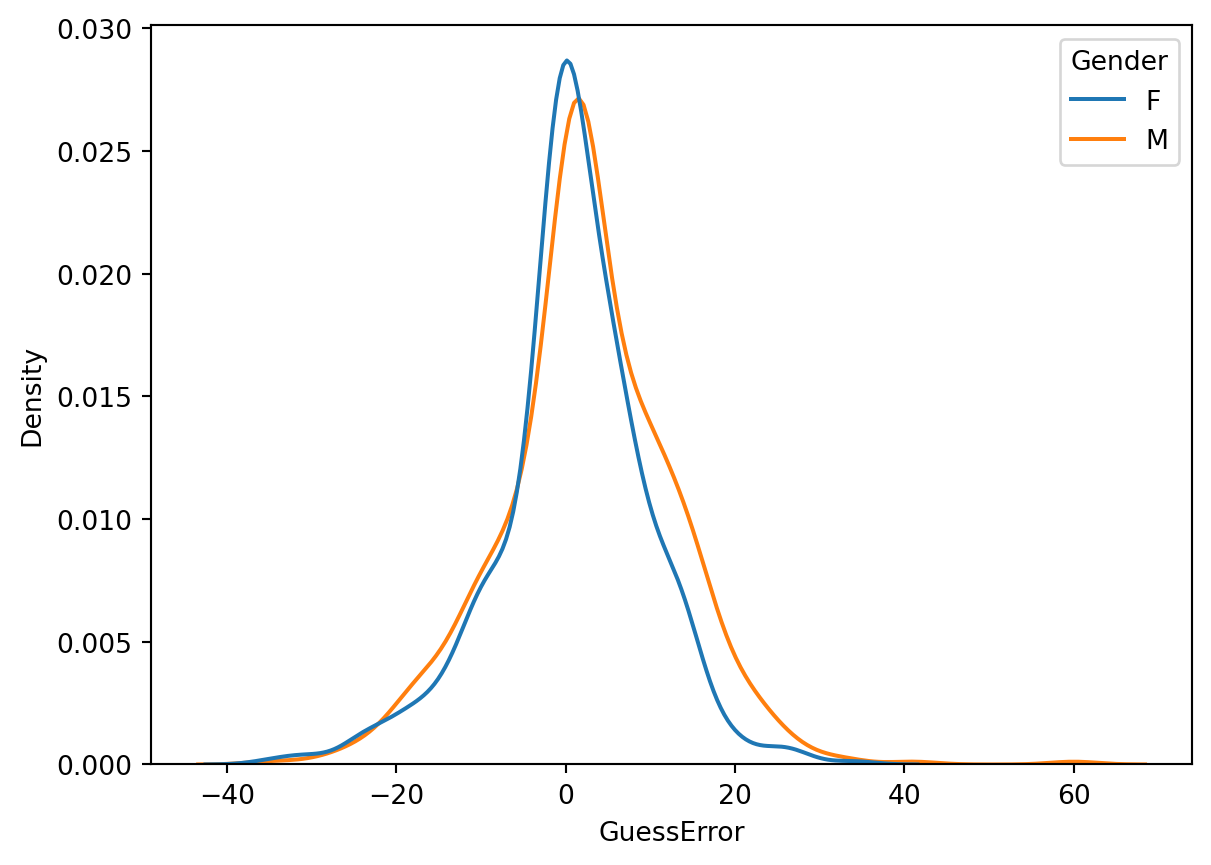

In [37]:
sns.kdeplot(data = dt, x="GuessError", hue="Gender")

## Of Variability and Variance

Until now we have discussed the span of the data and the inter-quartile range as measures of variability. Another measure of variability is the variance.

:::{#def-variance}
## The Sample Variance and Sample Standard Deviation

The variance of a collection of $n$ values $x_1, x_2, \ldots, x_n$ is calculated as the average (with a correction factor) of the squared differences between each value and the mean:

$$
\text{S}^2_{x} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

This is a short way of writing:

$$
\text{S}^2_{x} = \frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \ldots + (x_n - \bar{x})^2}{n - 1}
$$

The standard deviation is the square root of the variance:

$$
\text{S}_{x} = \sqrt{\text{S}^2_{x}}
$$

:::

What are the units of measurement of the variance and the standard deviation?

- Assume that x is measured in meters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in centimeters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in years. What are the units of measurement of the variance and the standard deviation?v


:::{#exm-variance}
## Computing the sample variance and the sample standard deviation

Given a set of measurements $x = (x_1 = 1, x_2 = 8, x_3 = 3)$, calculate the sample variance and the sample standard deviation.

:::
:::{.solution}

For the set $x$:

$$
\bar{x} = \frac{1 + 8 + 3}{3} = 4
$$

$$
\text{S}^2_{x} = \frac{(1 - 4)^2 + (8 - 4)^2 + (3 - 4)^2}{3 - 1} = \frac{9 + 16 + 1}{2} = 13
$$

:::


:::{#thm-variance-partition}
## Sum of Squares formula

The centerpiece of the definition of the sample variance is the sum of squared deviations from the mean. This sum can also be calculated according to the following formula:

$$
\sum_{i = 1}^{n} (x_i - \bar{x})^2 = \sum_{i = 1}^{n} x_i^2 - n \bar{x}^2
$$
:::
:::{.proof}

Let's start with the left hand side of the equation:

$$
\begin{align*}
\sum_{i = 1}^{n} (x_i - \bar{x})^2 & = \sum_{i = 1}^{n} (x_i^2 - 2x_i\bar{x} + \bar{x}^2) \\
& = \sum_{i = 1}^{n} x_i^2 - 2\bar{x} \sum_{i = 1}^{n} x_i + n\bar{x}^2 \\
& = \sum_{i = 1}^{n} x_i^2 - 2n\bar{x}^2 + n\bar{x}^2 \\
& = \sum_{i = 1}^{n} x_i^2 - n\bar{x}^2
\end{align*}
$$

:::

In [38]:
# To calculate the variances in Python it is convenient to first store the values into variables

x = [1, 8, 3]

print("x =", x)

x = [1, 8, 3]


In [39]:
# Numpy provides functions to calculate the variance and standard deviation of a list of values.

# Computes the variance of the list x. ddof=1 means that the denominator is n-1 of the sum of squared differences is n - 1 (as in the formula above)
np.var(x, ddof=1)

np.float64(13.0)

In [40]:
# Compute the standard deviations of the list x. The ddof parameter is the same as in the variance function.

np.std(x, ddof=1)

np.float64(3.605551275463989)

In [41]:
# You can check that the standard deviation is the square root of the variance. np.sqrt computes the square root of its argument.

np.sqrt(np.var(x, ddof=1))

np.float64(3.605551275463989)

:::{#exr-variance}
## Computing the sample variance and the sample standard deviation

Given a set of measurements 
$$
y = (y_1 = 2, y_2 = 7, y_3 = 4)
$$

- Calculate the sample variance and the sample standard deviation (on a piece of paper).
- Calculate the same by creating a new array `y` and using the `mean` and `std` methods of the array. 
- Compare the results.

:::

In [42]:
# Write your code here



:::{#exr-variance-guess-duration}
## The Variance of the Guess Duration

Calculate the sample variance and the sample standard deviation of the guess duration (`GD`) column.
:::

In [43]:
# Exercise: Calculate the variance of the guess durations. First, use the `.var()` method and then the `np.var()` function and compare the results.

